In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('seaborn-v0_8')  
sns.set_theme(style="whitegrid")  

## Data Exploration

In [2]:
df = pd.read_csv("../build_dataset/output_csv/bloomberg_data.csv")

### Dataset Information

In [3]:
df_info = df.info()
df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3980 entries, 0 to 3979
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Issuer Ticker                3978 non-null   object 
 1   Issuer Name                  3978 non-null   object 
 2   Sales - 1 Yr Growth          2535 non-null   float64
 3   Profit Margin                2709 non-null   float64
 4   Return on Assets             3328 non-null   float64
 5   Offer Size (M)               3980 non-null   float64
 6   Shares Outstanding (M)       3980 non-null   float64
 7   Offer Price                  3980 non-null   float64
 8   Offer To 1st Close           3933 non-null   float64
 9   Market Cap at Offer (M)      3980 non-null   float64
 10  Trade Date (US)              3980 non-null   object 
 11  cusip                        3978 non-null   object 
 12  Cash Flow per Share          2965 non-null   float64
 13  Offer Size (M).1  

### Describe

In [4]:
df_description = df.describe()
df_description

,Sales - 1 Yr Growth,Profit Margin,Return on Assets,Offer Size (M),Shares Outstanding (M),Offer Price,Offer To 1st Close,Market Cap at Offer (M),Cash Flow per Share,Offer Size (M).1,Shares Outstanding (M).1,Instit Owner (% Shares Out),Instit Owner (Shares Held),Fed Rate,CPI,Consumer Confidence,Unemployment Rate
count,2535.000000,2709.000000,3328.000000,3980.000000,3980.000000,3980.000000,3933.000000,3980.000000,2965.000000,3980.000000,3980.000000,2.574000e+03,2.577000e+03,3980.000000,3980.000000,3980.000000,3980.000000
mean,466.440399,-734.150672,-4.857451,281.040474,38.477917,14.764685,14.578712,706.127281,-170.563563,281.040474,38.477917,4.594990e+01,5.004065e+07,1.961090,0.196907,88.084874,5.824171
std,13916.890782,12073.730675,820.334548,685.860848,84.787259,6.866491,34.709972,2616.241064,9343.656685,685.860848,84.787259,4.153272e+01,1.531728e+08,2.123589,0.321802,11.005772,1.861031
min,-1025.400000,-444661.000000,-3400.000000,0.100000,0.000000,0.000000,-100.000000,0.000000,-508777.000000,0.100000,0.000000,3.540000e-12,1.000000e-05,0.040000,-1.915290,55.300000,3.500000
25%,-0.600000,-44.700000,-27.600000,70.003000,9.196562,10.000000,0.000000,92.920000,-0.700000,70.003000,9.196562,6.149600e+00,1.198120e+06,0.110000,0.000000,80.400000,4.400000
50%,14.400000,-1.900000,-1.400000,136.562000,21.849900,14.500000,2.000000,270.713500,0.200000,136.562000,21.849900,3.480625e+01,1.057040e+07,1.160000,0.173200,89.100000,5.400000
75%,38.500000,10.100000,3.100000,277.777000,39.028575,19.000000,18.000000,586.334000,2.000000,277.777000,39.028575,8.657895e+01,5.000140e+07,3.300000,0.452233,95.925000,6.700000
max,662658.000000,36561.800000,47045.400000,19650.400000,2138.080000,120.000000,507.500000,81247.200000,899.000000,19650.400000,2138.080000,1.860000e+02,4.986780e+09,6.860000,1.221996,112.000000,14.800000


### Count Duplicates

In [5]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicates: {duplicate_count}")

Number of duplicates: 0


### Count Unique

In [6]:
countunique = pd.DataFrame(df.nunique(), columns=['Count'])
countunique

,Count
Issuer Ticker,3971
Issuer Name,3932
Sales - 1 Yr Growth,1240
Profit Margin,1437
Return on Assets,1085
Offer Size (M),2436
Shares Outstanding (M),3009
Offer Price,133
Offer To 1st Close,2033
Market Cap at Offer (M),3010


### Missing Values

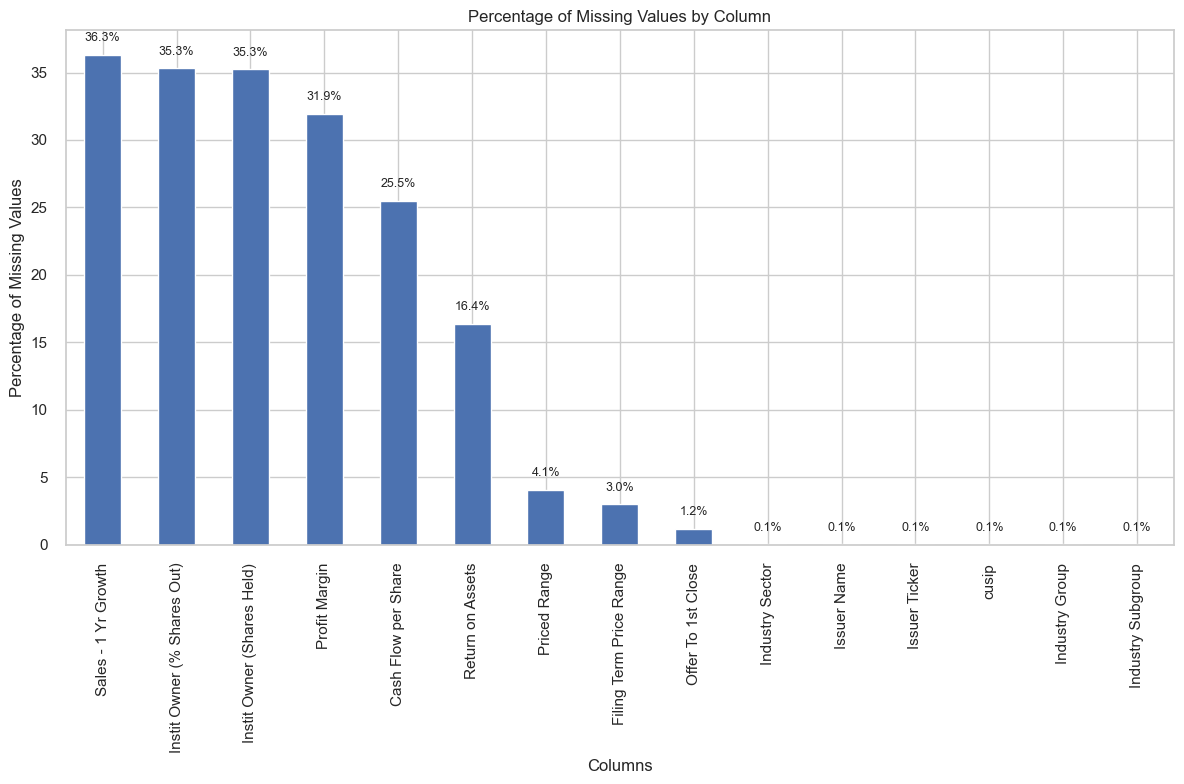

In [7]:
def missing_values_plot(df):
    # Missing values analysis
    missing_values = df.isnull().sum()
    missing_percentages = (missing_values / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing Values': missing_values,
        'Percentage': missing_percentages
    }).sort_values('Percentage', ascending=False)

    missing_df = missing_df[missing_df['Missing Values'] > 0]
    
    plt.figure(figsize=(12, 8))
    ax = missing_df['Percentage'].plot(kind='bar')
    plt.title('Percentage of Missing Values by Column')
    plt.xlabel('Columns')
    plt.ylabel('Percentage of Missing Values')
    plt.xticks(rotation=90)
    
    for i, v in enumerate(missing_df['Percentage']):
        ax.text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()

    return missing_df
    

missing_df = missing_values_plot(df)

In [8]:
missing_df

,Missing Values,Percentage
Sales - 1 Yr Growth,1445,36.306533
Instit Owner (% Shares Out),1406,35.326633
Instit Owner (Shares Held),1403,35.251256
Profit Margin,1271,31.934673
Cash Flow per Share,1015,25.502513
Return on Assets,652,16.381910
Priced Range,162,4.070352
Filing Term Price Range,119,2.989950
Offer To 1st Close,47,1.180905
Industry Sector,2,0.050251


### Numerical Outliers

In [9]:
def numerical_outlier_analysis(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    outlier_data = []
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)][col]
        if len(outliers) > 0:
            outlier_data.append({
                'Column': col,
                'Number of Outliers': len(outliers),
                'Percentage of Outliers': (len(outliers)/len(df))*100,
                'Lower Bound': Q1 - 1.5 * IQR,
                'Upper Bound': Q3 + 1.5 * IQR
            })
    
    outlier_df = pd.DataFrame(outlier_data)
    if not outlier_df.empty:
        display(outlier_df)

numerical_outlier_analysis(df)

,Column,Number of Outliers,Percentage of Outliers,Lower Bound,Upper Bound
0,Sales - 1 Yr Growth,318,7.989950,-5.925000e+01,9.715000e+01
1,Profit Margin,488,12.261307,-1.269000e+02,9.230000e+01
2,Return on Assets,267,6.708543,-7.365000e+01,4.915000e+01
3,Offer Size (M),380,9.547739,-2.416580e+02,5.894380e+02
4,Shares Outstanding (M),359,9.020101,-3.555146e+01,8.377659e+01
5,Offer Price,48,1.206030,-3.500000e+00,3.250000e+01
6,Offer To 1st Close,432,10.854271,-2.700000e+01,4.500000e+01
7,Market Cap at Offer (M),399,10.025126,-6.472010e+02,1.326455e+03
8,Cash Flow per Share,341,8.567839,-4.750000e+00,6.050000e+00
9,Offer Size (M).1,380,9.547739,-2.416580e+02,5.894380e+02


### Distribution of IPO Offer Prices

In [10]:
# Reload the dataset
df_new = pd.read_csv("../build_dataset/output_csv/bloomberg_data.csv")
df_new['Trade Date (US)'] = pd.to_datetime(df_new['Trade Date (US)'], errors='coerce')

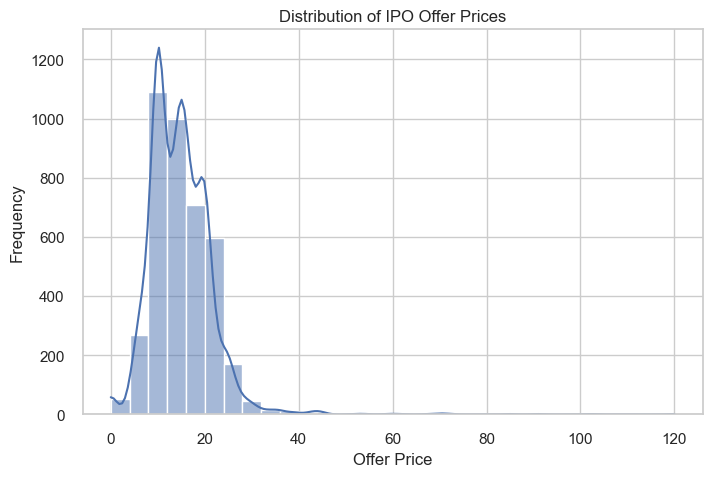

In [11]:
def offer_price_distribution(df):
    plt.figure(figsize=(8, 5))
    sns.histplot(df['Offer Price'].dropna(), bins=30, kde=True)
    plt.xlabel('Offer Price')
    plt.ylabel('Frequency')
    plt.title('Distribution of IPO Offer Prices')
    plt.show()

offer_price_distribution(df_new)

### Distribution of Market Capitalization at Offer

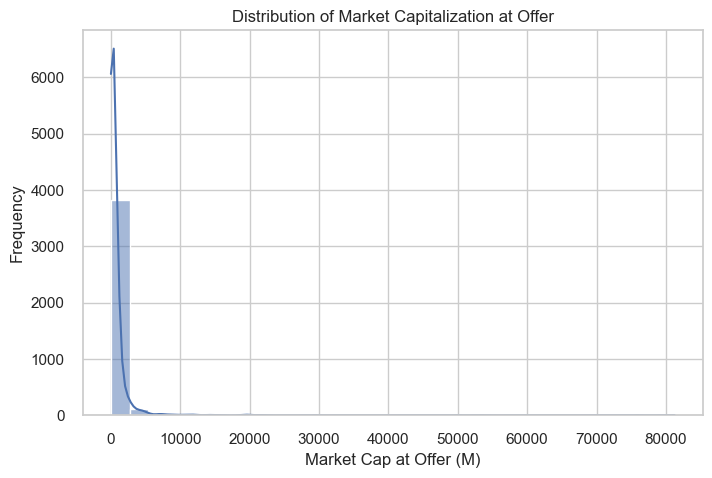

In [12]:
def market_cap_at_offer_distribution(df):
    plt.figure(figsize=(8, 5))
    sns.histplot(df['Market Cap at Offer (M)'].dropna(), bins=30, kde=True)
    plt.xlabel('Market Cap at Offer (M)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Market Capitalization at Offer')
    plt.show()

market_cap_at_offer_distribution(df)

### Number of IPOs over time

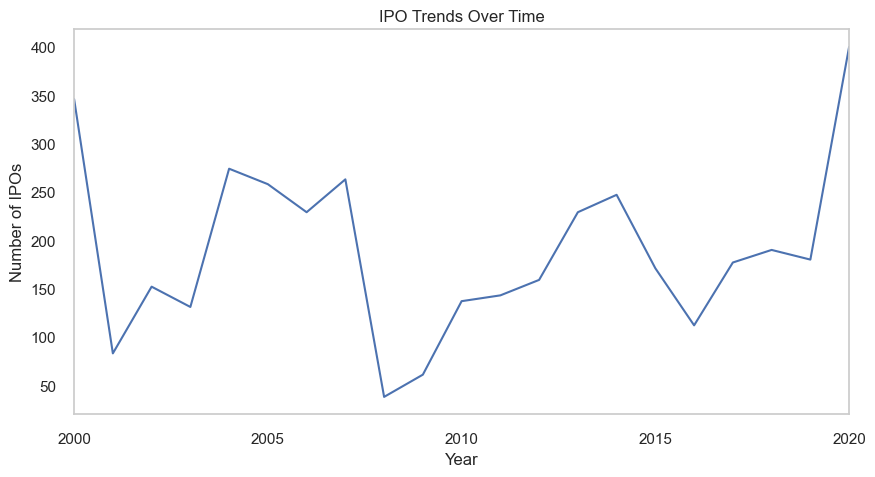

In [13]:
def number_of_ipos_over_time(df):
    df_tmp = df.copy()
    df_tmp.set_index('Trade Date (US)', inplace=True)
    df_tmp['IPO Count'] = 1
    ipo_trend = df_tmp.resample('YE')['IPO Count'].sum()

    plt.figure(figsize=(10, 5))
    ipo_trend.plot()
    plt.xlabel('Year')
    plt.ylabel('Number of IPOs')
    plt.title('IPO Trends Over Time')
    plt.grid(False)
    plt.show()

number_of_ipos_over_time(df_new)

### Industry Sector Distribution

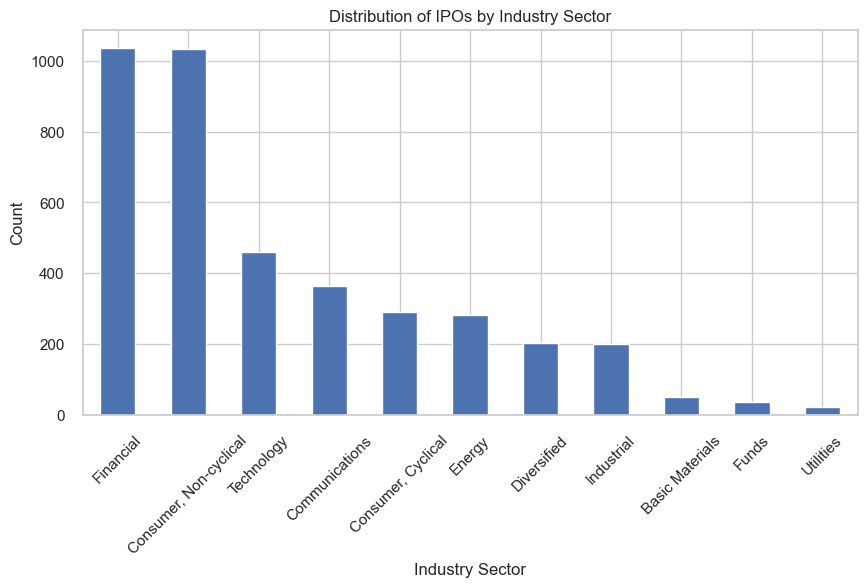

In [14]:
def industry_sector_distribution(df):
    plt.figure(figsize=(10, 5))
    df['Industry Sector'].value_counts().plot(kind='bar')
    plt.xlabel('Industry Sector')
    plt.ylabel('Count')
    plt.title('Distribution of IPOs by Industry Sector')
    plt.xticks(rotation=45)
    plt.show()

industry_sector_distribution(df)

### Correlation Matrix

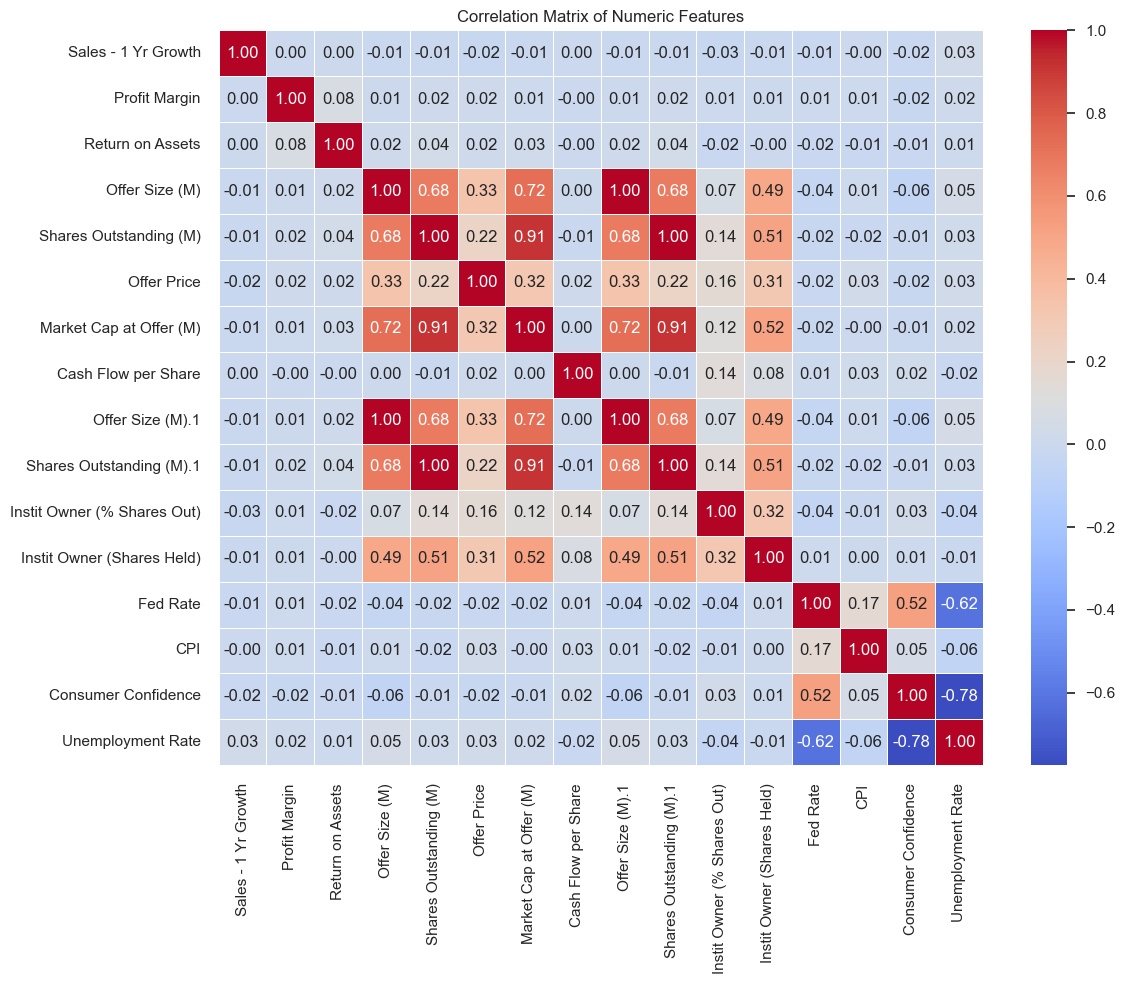

In [15]:
def correlation_matrix(df):
    """Perform comprehensive correlation analysis"""
    # Select numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    numeric_cols = numeric_cols[numeric_cols != 'Offer To 1st Close']
    
    # Correlation matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', 
                fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix of Numeric Features')
    plt.tight_layout()
    plt.show()

correlation_matrix(df)

### Offer To 1st Close Distribution

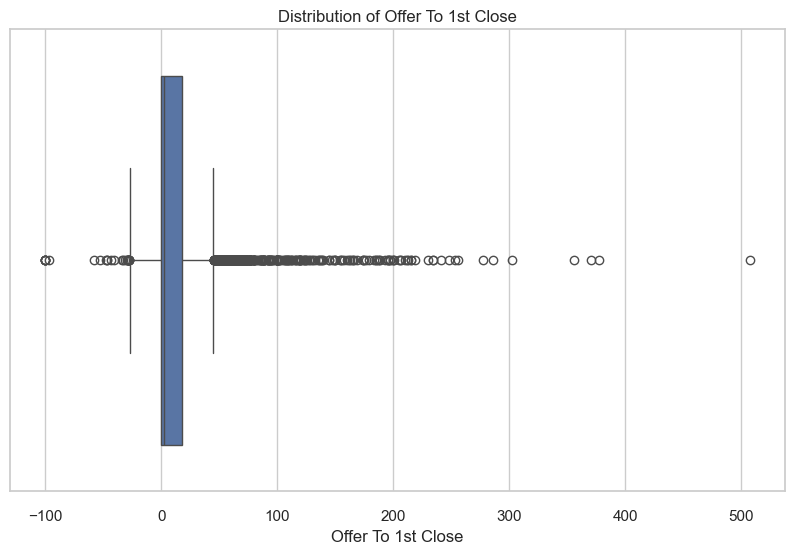

In [16]:
def offer_to_1st_close_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_new['Offer To 1st Close'].dropna())
    plt.xlabel('Offer To 1st Close')
    plt.title('Distribution of Offer To 1st Close')
    plt.show()

offer_to_1st_close_distribution(df)

### Offer To 1st Close Distribution by Industry

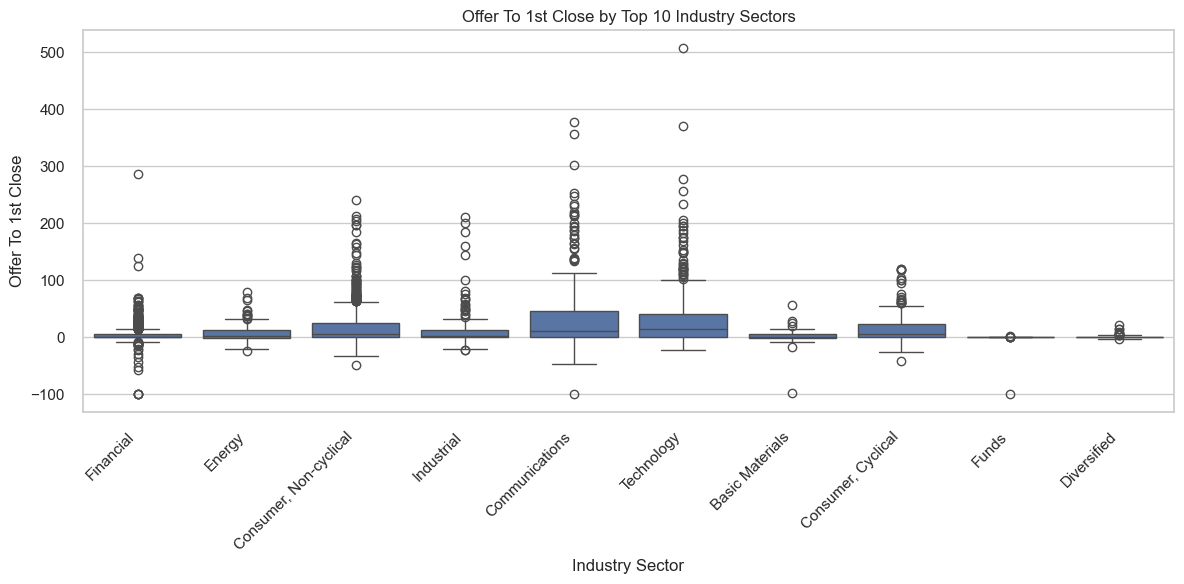

In [17]:
def analyze_target_variable(df):
    """Analyze the target variable (Offer To 1st Close)"""
    plt.figure(figsize=(12, 6))
    top_sectors = df['Industry Sector'].value_counts().head(10).index
    df_top_sectors = df[df['Industry Sector'].isin(top_sectors)].copy()
    
    df_top_sectors = df_top_sectors.reset_index(drop=True)
    ax = sns.boxplot(x='Industry Sector', y='Offer To 1st Close', data=df_top_sectors)
    plt.xticks(rotation=45, ha='right')
    plt.title('Offer To 1st Close by Top 10 Industry Sectors')
    plt.tight_layout()
    plt.show()


analyze_target_variable(df)